In [50]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [51]:
# reading the data from csv
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\data_set\happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#data description 
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
#There are 158 rows and 12 columns
df.shape

(158, 12)

In [5]:
#checking for missing value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#checking how many categories are there in this column 
df['Region'].unique()  #looks like 10 categories #need to encode it using get_dummies

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [17]:
#dropping object columns so as to plot dist plot
df2=df.drop(["Country","Region"],axis=1)
df2.columns
df2.info() # checking to see id there are any object features or not # no of cfeature present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [18]:
#Dropping the Happiness Rank as it is not giving insight
df2=df2.drop(["Happiness Rank"],axis=1)

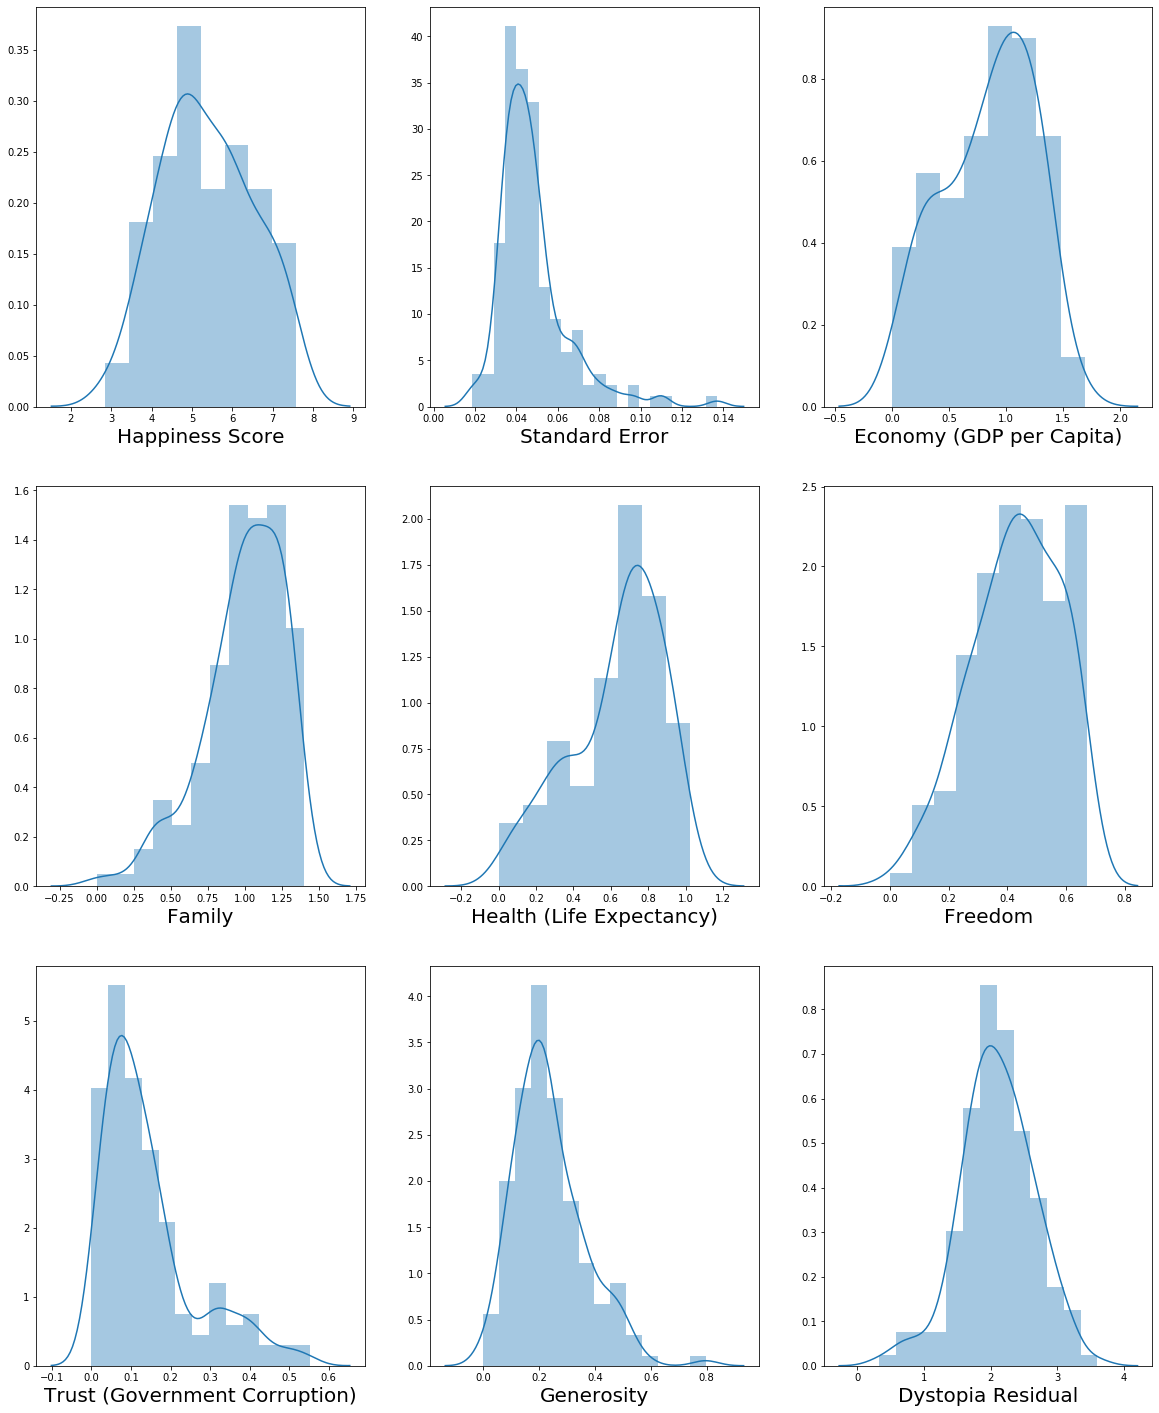

In [19]:
#dist plot for categorical variable to see skewness
plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in df2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

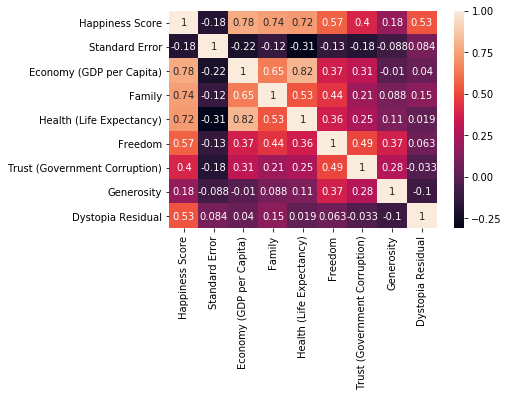

In [20]:
#checking the correlation with the help heatmap.
#first  row was  cut in half, so wrote the below code to fix that.
data=df2.corr()
plt.plot(figsize=(25,20))
ax=sns.heatmap(data,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

###From the heatplot we can see that Economy family and health(Life expectancy) are strongly correlated to happiness score.

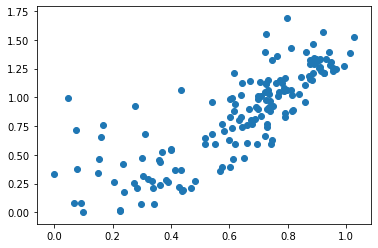

In [35]:
# there is strong relation b/w health and economy
plt.scatter(df2['Health (Life Expectancy)'],df2['Economy (GDP per Capita)'])
plt.show()

In [55]:
#checking the shape of data after dropping columns
print("the shape dataset ---- ",df2.shape ,"\n")
df2.info()  # all are float datatype.

the shape dataset ----  (158, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9)
memory usage: 11.2 KB


In [34]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [23]:
#dropping the std err
df2=df2.drop(["Standard Error"],axis=1)

In [24]:
# we will split the data in fatures and label
X=df2.drop(["Happiness Score"],axis=1)
y=df2["Happiness Score"]

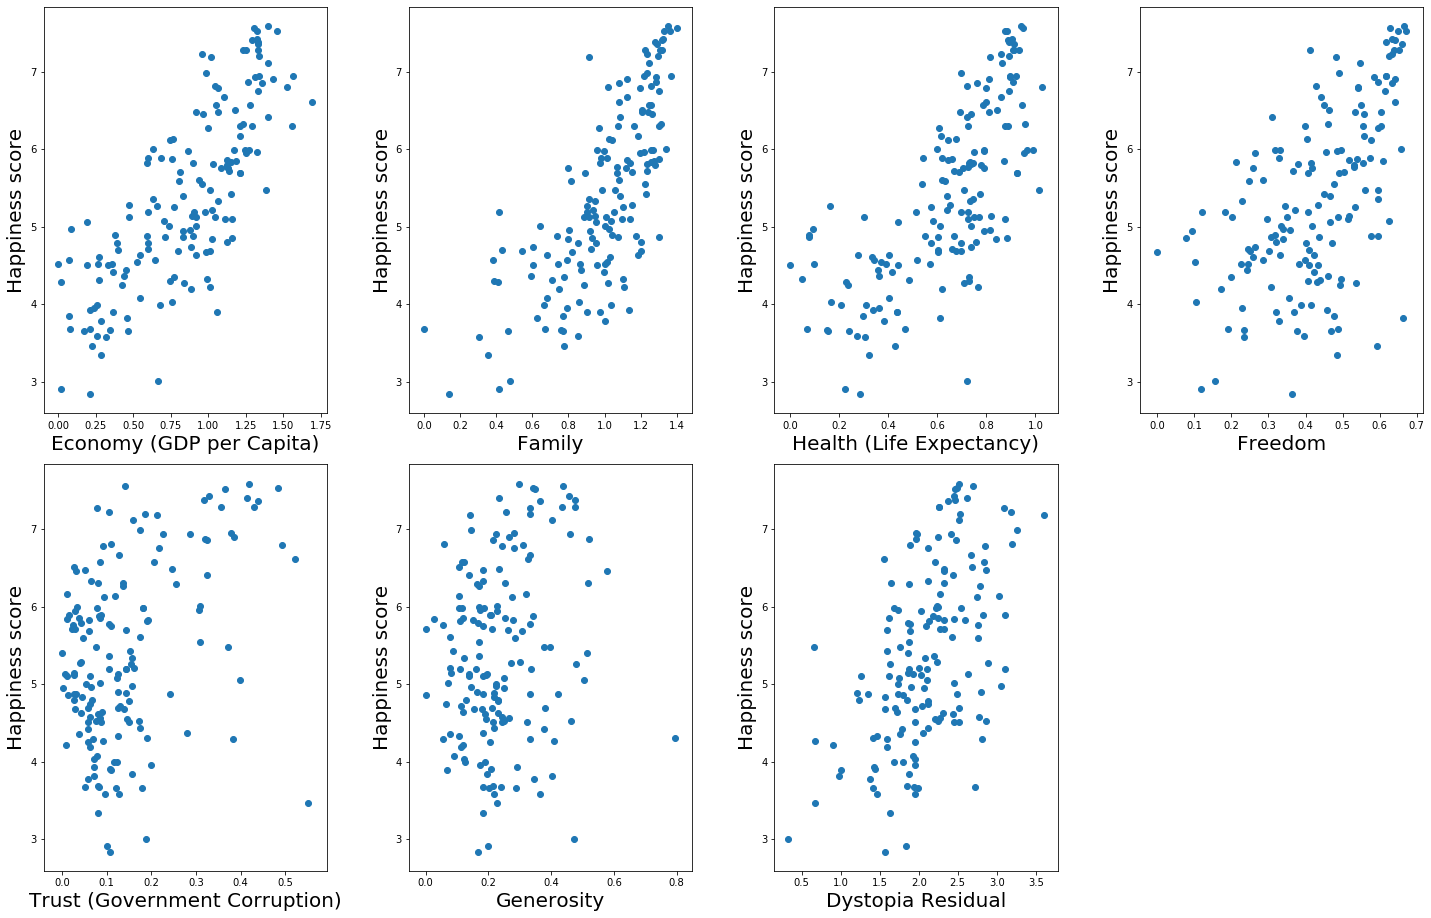

In [25]:
#let plot and see the scatter plot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# by seeing the scatter plot there no relation between std error and happiness score
#we will remove that variable after seeing the accuracy

In [26]:
#let scale our data for further processing
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [27]:
#split the data into train and test .MOdel will train on trian set .
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=43)


In [28]:
#model instantating and training
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=regression.predict(X_test)

In [30]:
#checking the Adj R2 score on train data
print(f"Regression R2: {regression.score(X_test,y_test)}")

Regression R2: 0.9999999370457096


In [84]:
#checking the Adj R2 score on test data
regression.score(X_train,y_train)
print(f"Regression R2: {regression.score(X_train,y_train)}")

Regression R2: 0.9999999418348633


In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [86]:
mean_absolute_error(y_test,y_pred)

0.000259611148893657

In [87]:
mean_squared_error(y_test,y_pred)

9.081795220734501e-08

In [52]:
#MOdel could be overfitting hence droping Std err column
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
#Using the Z-score to treat the skewness in data
from scipy.stats import zscore
#Z_score=zscore(df[['Standard Error','Economy (GDP per Capita)','Family','Trust (Government Corruption)','Generosity']])
z_score= zscore(df[['Standard Error','Economy (GDP per Capita)','Family','Trust (Government Corruption)','Generosity']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]


In [54]:
#dropping object columns so as to plot dist plot
df2=df.drop(["Country","Region"],axis=1)

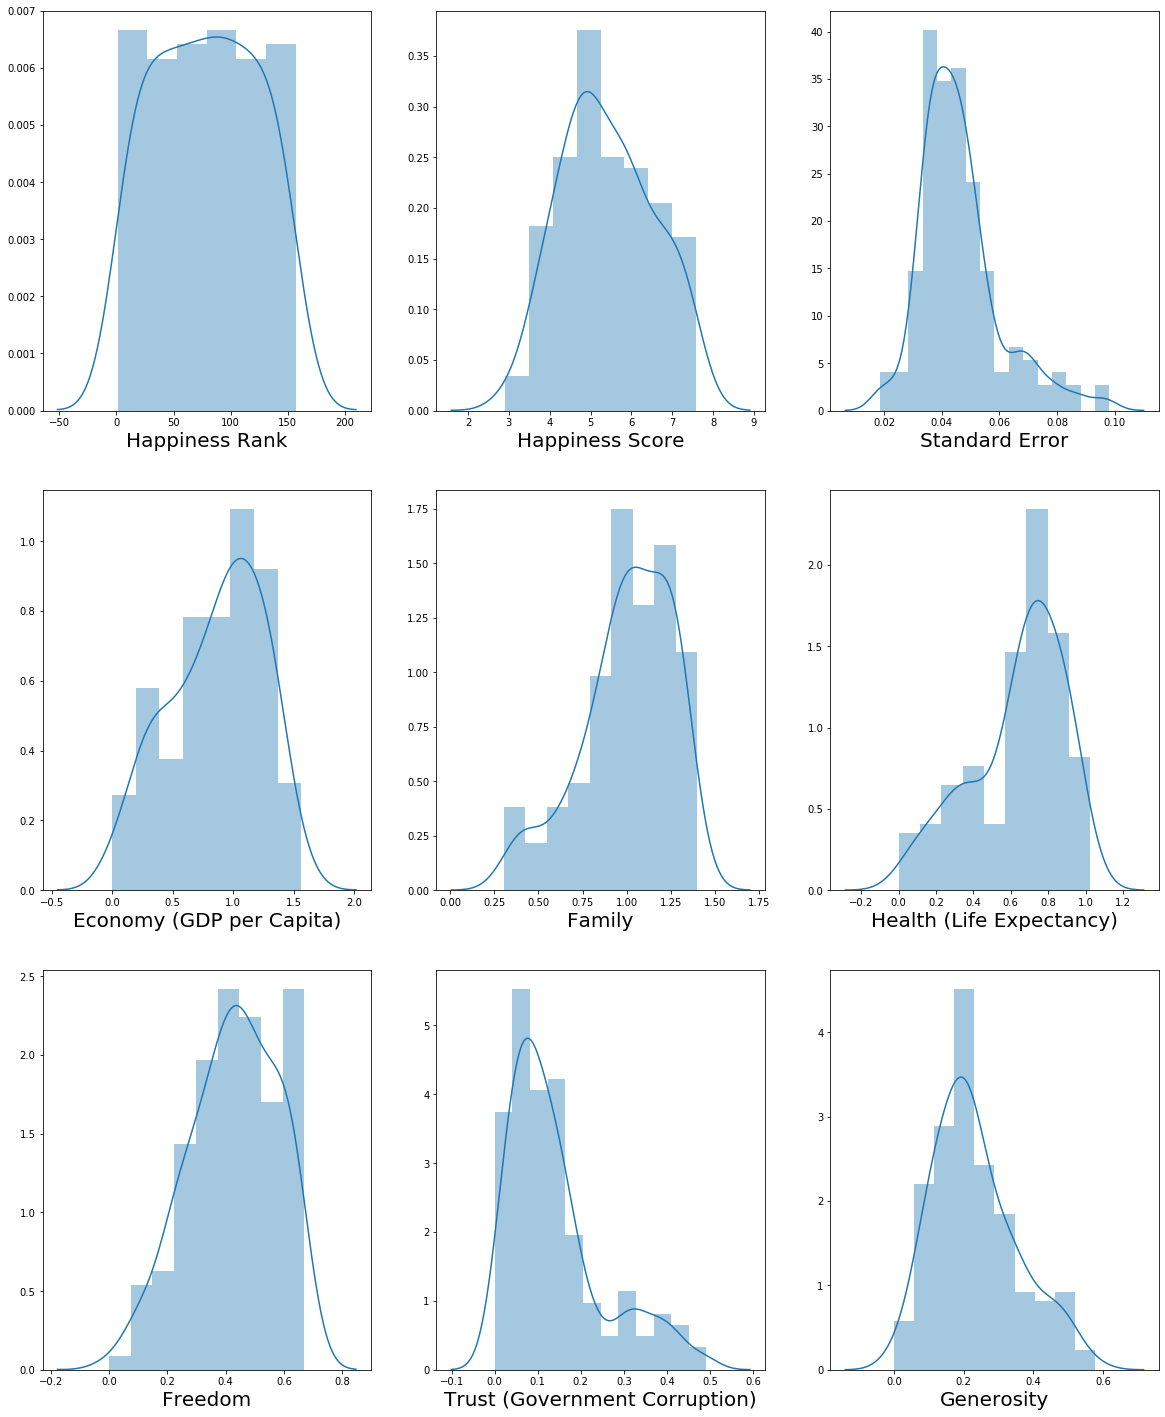

In [55]:
#dist plot for categorical variable to see skewness
plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in df2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

In [56]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [59]:
df_dummies=pd.get_dummies(df["Region"])
df_dummies

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0,0,0,0,1,0,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0


In [60]:
#Join the dummies with main data frame
df=df.join(df_dummies)


In [61]:
#Trying the new model by including region and encoding it using get_dummies.

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0,0,0,0,0,0,0,0,0,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0,0,0,0,0,0,0,0,0,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0,0,0,0,0,1,0,0,0,0


In [62]:
#Dropping the country ,Region,Happiness Rank column
df=df.drop(['Country','Region','Happiness Rank'],axis=1)

In [63]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,0,0,0,0,0,0,0,0,1,0
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,0,0,0,0,0,0,0,1,0,0
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,0,1,0
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,0,1,0,0,0,0,0


In [64]:
# we will split the data in fatures and label
X=df.drop(["Happiness Score"],axis=1)
y=df["Happiness Score"]

In [65]:
#let scale our data for further processing
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)


In [67]:
#split the data into train and test .MOdel will train on trian set .
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=43)

In [68]:
#model instantating and training
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred=regression.predict(X_test)
#checking the Adj R2 score on test data
regression.score(X_train,y_train)
print(f"Regression R2: {regression.score(X_train,y_train)}")

Regression R2: 0.9999999430078473


In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
mean_absolute_error(y_test,y_pred)

0.00025163527936132796